In [1]:
import pandas as pd
customers = pd.read_csv('mallcustomers.csv')

customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [2]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
customers.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60560.000000,50.200000
std,57.879185,13.969007,26264.721165,25.823522
min,1.000000,18.000000,15000.000000,1.000000
25%,50.750000,28.750000,41500.000000,34.750000
50%,100.500000,36.000000,61500.000000,50.000000
75%,150.250000,49.000000,78000.000000,73.000000
max,200.000000,70.000000,137000.000000,99.000000


In [10]:
customers.describe(include='all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

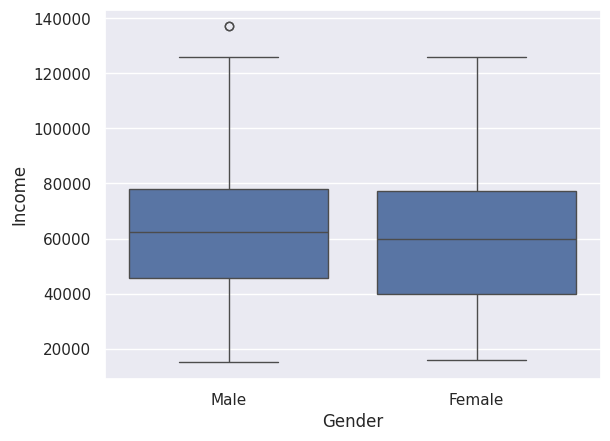

In [22]:
ax = sns.boxplot(data = customers,
                 x = 'Gender',
                 y = 'Income'
                )

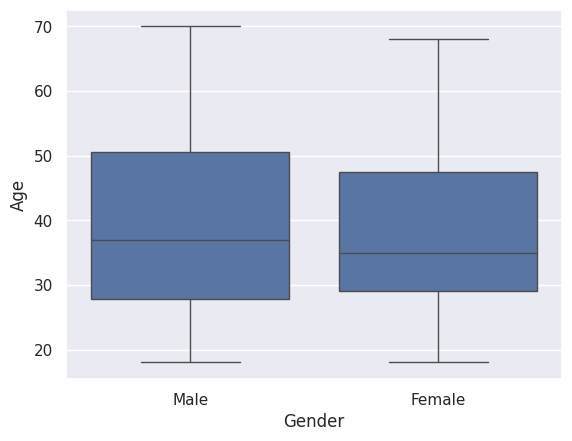

In [23]:
ax = sns.boxplot(data = customers,
                 x = 'Gender',
                 y = 'Age'
                )

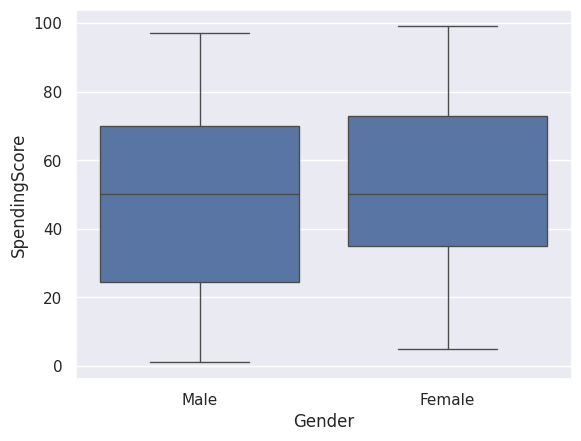

In [25]:
ax = sns.boxplot(data = customers,
                 x = 'Gender',
                 y = 'SpendingScore'
                )

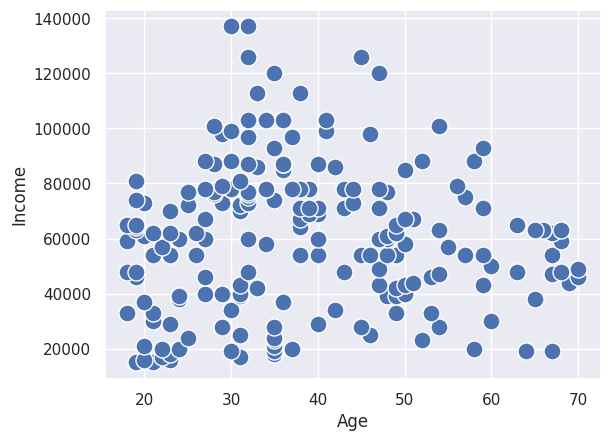

In [26]:
ax = sns.scatterplot(data = customers,
                     x = 'Age',
                     y = 'Income',
                     s = 150
                    )

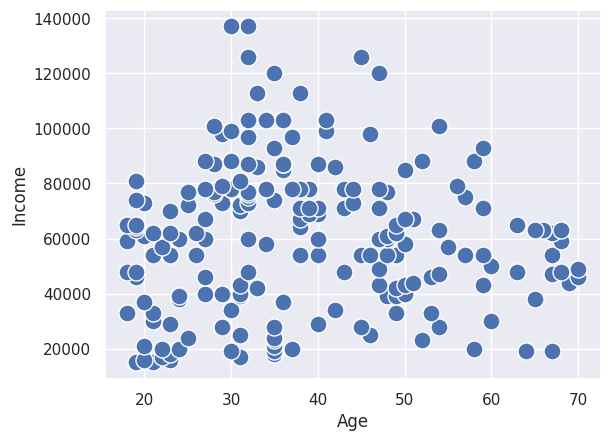

In [27]:
ax = sns.scatterplot(data = customers,
                     x = 'Age',
                     y = 'Income',
                     s = 150
                    )

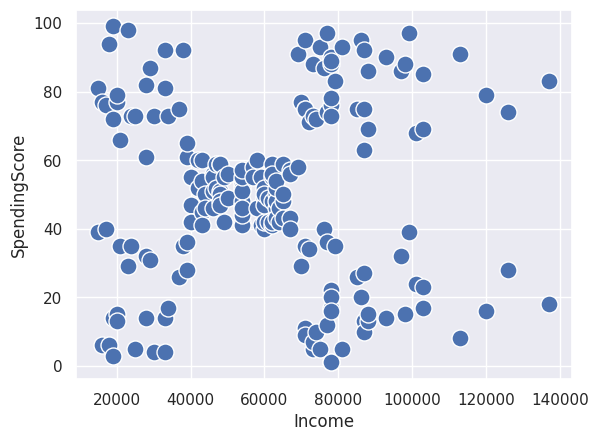

In [28]:
ax = sns.scatterplot(data = customers,
                     x = 'Income',
                     y = 'SpendingScore',
                     s = 150
                    )

**Prepare Data**

In [30]:
customers[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])

In [32]:
customers_scaled = pd.DataFrame(customers_scaled, columns = ['Income', 'SpendingScore'])

In [33]:
customers_scaled.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


**Create Clusters**

In [34]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [35]:
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [36]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [38]:
km.inertia_

157.70400815035939

**Evaluate and Visualize Clusters**

In [40]:
pd.Series(km.labels_).value_counts().sort_index()

,count
0,38
1,39
2,123


In [41]:
km.cluster_centers_

array([[ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275],
       [-0.62618966, -0.01439238]])

In [42]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,1.009200,-1.225535
1,0.991583,1.239503
2,-0.626190,-0.014392


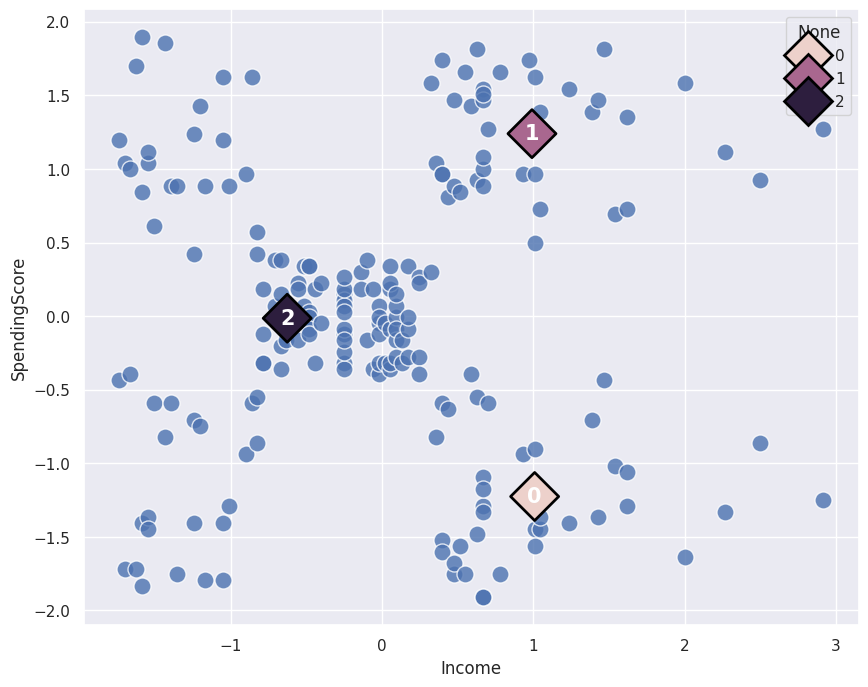

In [44]:
plt.figure(figsize = (10, 8))

# plot clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore',
                     alpha = 0.8,
                     s = 150
                    )
# plot centroids
ax = sns.scatterplot(data = cluster_centers,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = cluster_centers.index,
                     marker = 'D',
                     s = 600,
                     ec = 'black'
                    )

# plot centroid labels
for i in range(len( cluster_centers)):
  plt.text(x = cluster_centers.Income[i],
           y = cluster_centers.SpendingScore[i],
           s = i,
           horizontalalignment = 'center',
           verticalalignment = 'center',
           size = 15,
           color = 'white',
           weight = 'bold'
          )



**Choose right number of Clusters**

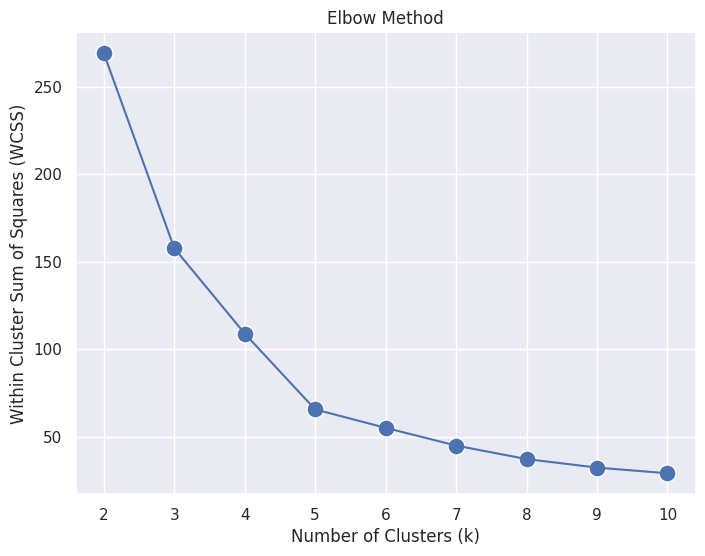

In [49]:
wcss = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
  km.fit(customers_scaled)
  wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize = (8, 6))
ax = sns.lineplot(x = wcss_series.index, y = wcss_series)
ax = sns.scatterplot(x = wcss_series.index, y = wcss_series, s = 150)
# ax = ax.set_xlabel('Number of Clusters (k)')
# ax = ax.set_ylabel('Within Cluster Sum of Squares (WCSS)')
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'Within Cluster Sum of Squares (WCSS)',
            title = 'Elbow Method'
           )
# ax = ax.set_title('Elbow Method')


**Average Silhouette Score**

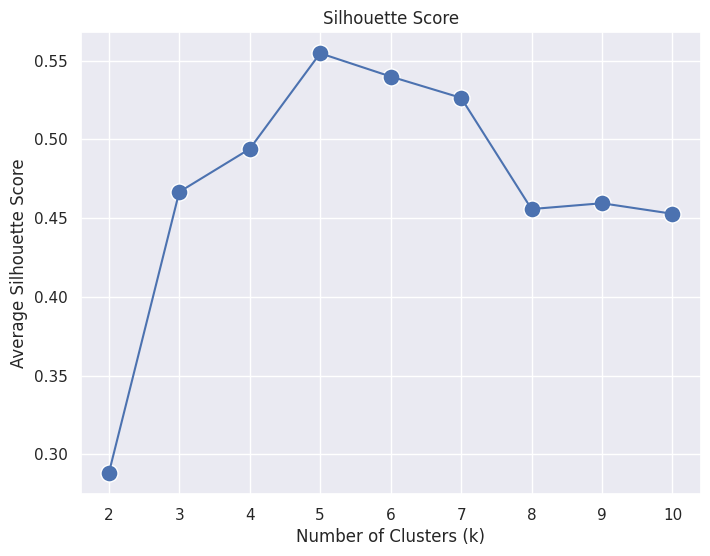

In [50]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
  km.fit(customers_scaled)

  silhouette.append(silhouette_score(customers_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize = (8, 6))
ax = sns.lineplot(x = silhouette_series.index, y = silhouette_series)
ax = sns.scatterplot(x = silhouette_series.index, y = silhouette_series, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'Average Silhouette Score',
            title = 'Silhouette Score'
           )


**Calinski Harabasz Score**

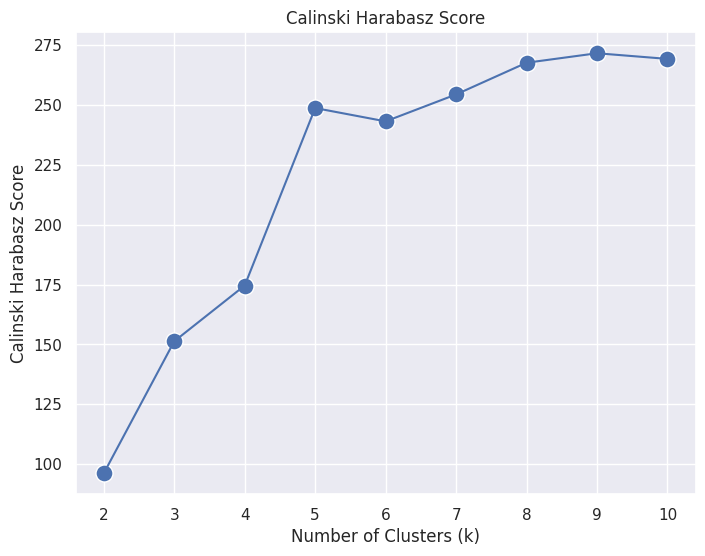

In [51]:
from sklearn.metrics import calinski_harabasz_score

calinski = []

for k in range(2, 11):
  km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
  km.fit(customers_scaled)

  calinski.append(calinski_harabasz_score(customers_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize = (8, 6))
ax = sns.lineplot(x = calinski_series.index, y = calinski_series)
ax = sns.scatterplot(x = calinski_series.index, y = calinski_series, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'Calinski Harabasz Score',
            title = 'Calinski Harabasz Score'
           )



**Analyze and Interpret Clusters**

In [52]:
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(customers_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [53]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,-1.307519,-1.136965
1,0.991583,1.239503
2,-1.329545,1.132178
3,1.055003,-1.284439
4,-0.200913,-0.026456


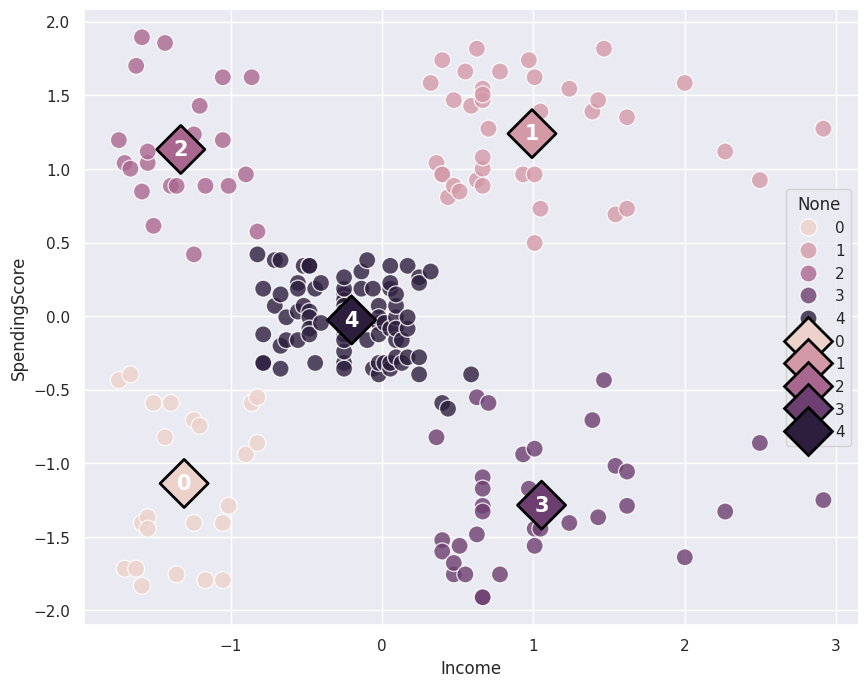

In [54]:
plt.figure(figsize = (10, 8))

# plot clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = km.labels_,
                     alpha = 0.8,
                     s = 150
                    )

#Plot Centroids
ax = sns.scatterplot(data = cluster_centers,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = cluster_centers.index,
                     marker = 'D',
                     s = 600,
                     ec = 'black'
                    )
#Add Centroid Labels
for i in range(len( cluster_centers)):
  plt.text(x = cluster_centers.Income[i],
           y = cluster_centers.SpendingScore[i],
           s = i,
           horizontalalignment = 'center',
           verticalalignment = 'center',
           size = 15,
           color = 'white',
           weight = 'bold'
          )


In [55]:
customers['Cluster'] = km.labels_.tolist()
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,2
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,2
4,5,Female,31,17000,40,0


In [56]:
customers = pd.get_dummies(customers, columns = ['Gender'])
customers.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,False,True
1,2,21,15000,81,2,False,True
2,3,20,16000,6,0,True,False
3,4,23,16000,77,2,True,False
4,5,31,17000,40,0,True,False
5,6,22,17000,76,2,True,False
6,7,35,18000,6,0,True,False
7,8,23,18000,94,2,True,False
8,9,64,19000,3,0,False,True
9,10,30,19000,72,2,True,False


In [57]:
customers.agg({'Gender_Female': 'mean', 'Gender_Male': 'mean',
               'Age': 'median',
               'Income': 'median',
               'SpendingScore': 'median'
               }).round(2)

,0
Gender_Female,0.56
Gender_Male,0.44
Age,36.00
Income,61500.00
SpendingScore,50.00


In [58]:
customers.groupby('Cluster').agg({'Gender_Female': 'mean', 'Gender_Male': 'mean',
                                  'Age': 'median',
                                  'Income': 'median',
                                  'SpendingScore': 'median'
                                  }).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.54,0.46,32.0,79000.0,83.0
2,0.59,0.41,23.5,24500.0,77.0
3,0.46,0.54,42.0,85000.0,16.0
4,0.59,0.41,46.0,54000.0,50.0
